In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from WindPy import w
from adjustText import adjust_text
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [15]:
sectors = pd.read_excel('../data/申万行业分类表.xlsx')
code2sector = pd.read_excel('../data/申万行业分类表.xlsx', sheet_name='申万二级行业市值')

In [24]:
dataframes = []
for s in sectors.columns[:4]:
    industry = sectors[s].dropna().tolist()
    df = pd.DataFrame(columns=['wind_code', 'sec_name'])
    for i in industry:
        code = code2sector[code2sector['名称'] == i]['代码'].iloc[0]
        data = w.wset("sectorconstituent","windcode=%s;field=wind_code,sec_name"%(code))
        stocks = pd.DataFrame(data.Data, index=data.Fields)
        stocks = stocks.T
        df = df.append(stocks)
        print(i, code)
    dataframes.append(df)

银行Ⅱ(申万) 801192.SI
多元金融Ⅱ(申万) 801191.SI
券商Ⅱ(申万) 801193.SI
保险Ⅱ(申万) 801194.SI
房地产开发Ⅱ(申万) 801181.SI
汽车整车(申万) 801094.SI
汽车零部件Ⅱ(申万) 801093.SI
白色家电(申万) 801111.SI
景点(申万) 801212.SI
酒店Ⅱ(申万) 801213.SI
旅游综合Ⅱ(申万) 801214.SI
其他休闲服务Ⅱ(申万) 801215.SI
水泥制造Ⅱ(申万) 801711.SI
装修装饰Ⅱ(申万) 801722.SI
饮料制造(申万) 801123.SI
化学制品(申万) 801034.SI
食品加工(申万) 801124.SI
化学制药(申万) 801151.SI
中药Ⅱ(申万) 801155.SI
生物制品Ⅱ(申万) 801152.SI
医疗器械Ⅱ(申万) 801153.SI
医药商业Ⅱ(申万) 801154.SI
医疗服务Ⅱ(申万) 801156.SI
半导体(申万) 801081.SI
其他电子Ⅱ(申万) 801082.SI
元件Ⅱ(申万) 801083.SI
光学光电子(申万) 801084.SI
电子制造Ⅱ(申万) 801085.SI
通信设备(申万) 801102.SI
计算机设备Ⅱ(申万) 801101.SI
计算机应用(申万) 801222.SI
电机Ⅱ(申万) 801731.SI
电气自动化设备(申万) 801732.SI
电源设备(申万) 801733.SI
高低压设备(申万) 801734.SI
营销传播(申万) 801751.SI
互联网传媒(申万) 801752.SI
文化传媒(申万) 801761.SI
稀有金属(申万) 801054.SI


# 金融地产

In [94]:
start_date = pd.to_datetime('2010-01-01')

In [90]:
data = w.wss(dataframes[0]['wind_code'].tolist(), 'sec_name,ipo_date')

In [92]:
df = pd.DataFrame(data.Data, index=['sec_name', 'ipo_date'], columns=data.Codes)
df = df.T

In [104]:
ret, vol = [], []
for code in df.index:
    st_date = df.loc[code, 'ipo_date'] if df.loc[code, 'ipo_date'] > start_date else start_date
    data = w.wss(code, 'risk_returnyearly_index,stdevry', 'startDate=%s;endDate=20200715;returnType=1;period=2'%(st_date.strftime('%Y%m%d')))
    ret.append(data.Data[0][0])
    vol.append(data.Data[1][0])
df['ret'] = ret
df['vol'] = vol

In [110]:
df = df[(df['vol'] < 75) & (df['ret'] < 100)]

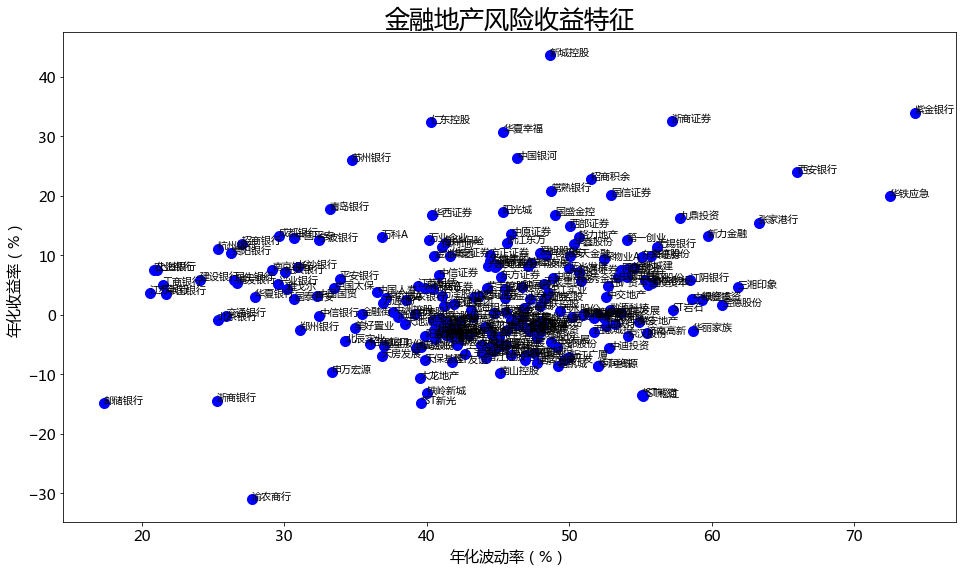

In [111]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.scatter(df['vol'], df['ret'], color='blue', s=100)

# for i, txt in enumerate(df['sec_name']):
#     ax.annotate(txt.rstrip('(申万)'), (df['vol'][i], df['ret'][i]), fontsize=10)
texts = [ax.text(df['vol'][i], df['ret'][i], df['sec_name'][i], fontsize=10) for i in range(df.shape[0])]
# adjust_text(texts)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel('年化收益率（%）', fontsize=15)
ax.set_xlabel('年化波动率（%）', fontsize=15)
_ = ax.set_title('金融地产风险收益特征', fontsize=25, y=1)
fig.savefig('../pic/金融地产风险收益特征.png', format='png', dpi=400, bbox_inches='tight')

# 可选消费

In [112]:
data = w.wss(dataframes[1]['wind_code'].tolist(), 'sec_name,ipo_date')

In [113]:
df = pd.DataFrame(data.Data, index=['sec_name', 'ipo_date'], columns=data.Codes)
df = df.T

In [114]:
ret, vol = [], []
for code in df.index:
    st_date = df.loc[code, 'ipo_date'] if df.loc[code, 'ipo_date'] > start_date else start_date
    data = w.wss(code, 'risk_returnyearly_index,stdevry', 'startDate=%s;endDate=20200715;returnType=1;period=2'%(st_date.strftime('%Y%m%d')))
    ret.append(data.Data[0][0])
    vol.append(data.Data[1][0])
df['ret'] = ret
df['vol'] = vol

In [115]:
df = df[(df['vol'] < 75) & (df['ret'] < 100)]

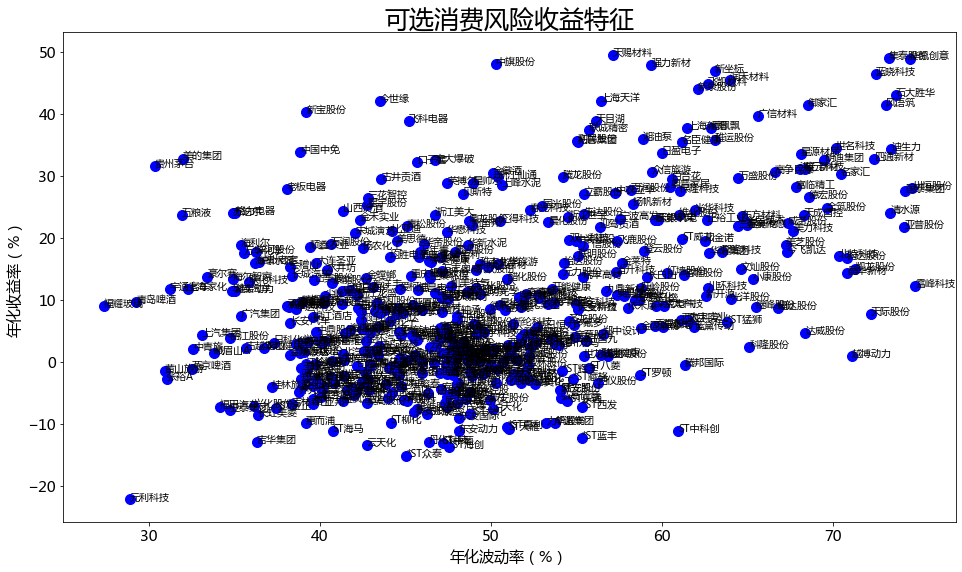

In [116]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.scatter(df['vol'], df['ret'], color='blue', s=100)

# for i, txt in enumerate(df['sec_name']):
#     ax.annotate(txt.rstrip('(申万)'), (df['vol'][i], df['ret'][i]), fontsize=10)
texts = [ax.text(df['vol'][i], df['ret'][i], df['sec_name'][i], fontsize=10) for i in range(df.shape[0])]
# adjust_text(texts)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel('年化收益率（%）', fontsize=15)
ax.set_xlabel('年化波动率（%）', fontsize=15)
_ = ax.set_title('可选消费风险收益特征', fontsize=25, y=1)
fig.savefig('../pic/可选消费风险收益特征.png', format='png', dpi=400, bbox_inches='tight')

# 必选医药

In [117]:
data = w.wss(dataframes[2]['wind_code'].tolist(), 'sec_name,ipo_date')

In [118]:
df = pd.DataFrame(data.Data, index=['sec_name', 'ipo_date'], columns=data.Codes)
df = df.T

In [119]:
ret, vol = [], []
for code in df.index:
    st_date = df.loc[code, 'ipo_date'] if df.loc[code, 'ipo_date'] > start_date else start_date
    data = w.wss(code, 'risk_returnyearly_index,stdevry', 'startDate=%s;endDate=20200715;returnType=1;period=2'%(st_date.strftime('%Y%m%d')))
    ret.append(data.Data[0][0])
    vol.append(data.Data[1][0])
df['ret'] = ret
df['vol'] = vol

In [120]:
df = df[(df['vol'] < 75) & (df['ret'] < 100)]

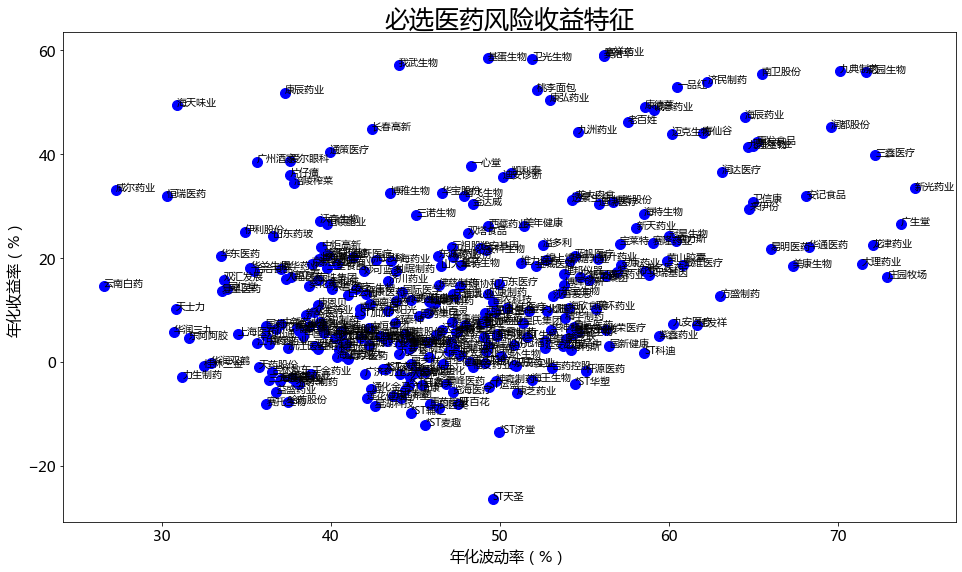

In [121]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.scatter(df['vol'], df['ret'], color='blue', s=100)

# for i, txt in enumerate(df['sec_name']):
#     ax.annotate(txt.rstrip('(申万)'), (df['vol'][i], df['ret'][i]), fontsize=10)
texts = [ax.text(df['vol'][i], df['ret'][i], df['sec_name'][i], fontsize=10) for i in range(df.shape[0])]
# adjust_text(texts)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel('年化收益率（%）', fontsize=15)
ax.set_xlabel('年化波动率（%）', fontsize=15)
_ = ax.set_title('必选医药风险收益特征', fontsize=25, y=1)
fig.savefig('../pic/必选医药风险收益特征.png', format='png', dpi=400, bbox_inches='tight')

# 信息科技

In [122]:
data = w.wss(dataframes[3]['wind_code'].tolist(), 'sec_name,ipo_date')

In [123]:
df = pd.DataFrame(data.Data, index=['sec_name', 'ipo_date'], columns=data.Codes)
df = df.T

In [124]:
ret, vol = [], []
for code in df.index:
    st_date = df.loc[code, 'ipo_date'] if df.loc[code, 'ipo_date'] > start_date else start_date
    data = w.wss(code, 'risk_returnyearly_index,stdevry', 'startDate=%s;endDate=20200715;returnType=1;period=2'%(st_date.strftime('%Y%m%d')))
    ret.append(data.Data[0][0])
    vol.append(data.Data[1][0])
df['ret'] = ret
df['vol'] = vol

In [129]:
df = df[(df['vol'] < 75) & (df['ret'] < 60)]

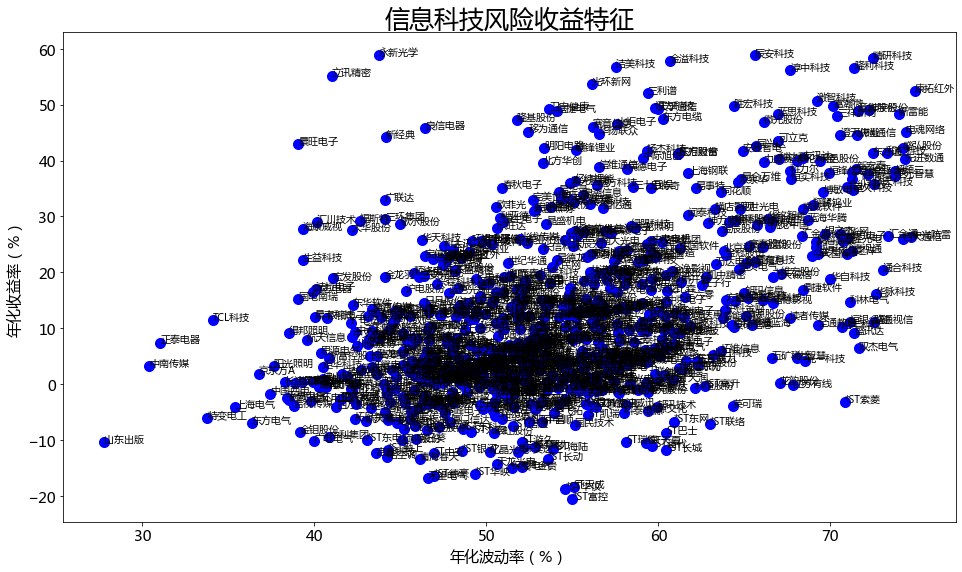

In [130]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.scatter(df['vol'], df['ret'], color='blue', s=100)

# for i, txt in enumerate(df['sec_name']):
#     ax.annotate(txt.rstrip('(申万)'), (df['vol'][i], df['ret'][i]), fontsize=10)
texts = [ax.text(df['vol'][i], df['ret'][i], df['sec_name'][i], fontsize=10) for i in range(df.shape[0])]
# adjust_text(texts)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel('年化收益率（%）', fontsize=15)
ax.set_xlabel('年化波动率（%）', fontsize=15)
_ = ax.set_title('信息科技风险收益特征', fontsize=25, y=1)
fig.savefig('../pic/信息科技风险收益特征.png', format='png', dpi=400, bbox_inches='tight')